# **COMP9727 Recommender Systems**
## Tutorial Week 2: Topic Classification

@Author: **Mingqin Yu**

@Reviewer: **Wayne Wobcke**

### Objective

The aim of the tutorial is to become more familiar with text processing pipelines for use in topic classification and content-based recommendation, focusing on Naive Bayes models for text classification. This will be important for the assignment, where this will form the basis of a recommender system.

### Before the tutorial

1. Look up regex, in particular the regular expression syntax. This will be used to identify "words" in the documents prior to classification.

2. Review the lecture material on Naive Bayes text classification and metrics for evaluation of classification models.

3. Read, understand and run all the code in the NLP pipeline below, and come prepared to discuss the answers to some of the questions.

### Overview of NLP Pipeline

1. **Loading the Dataset**
    - Load a subset of the '20 newsgroups' dataset
2. **Initial Data Cleansing**
    - Remove duplicate and missing values
2. **Data Preprocessing**
    - Convert the text to lower case
    - Remove punctuation and other characters
    - Tokenize the text
    - Remove stopwords
    - Stem the words
3. **Feature Extraction**
    - Convert the preprocessed text data into tf-idf values
4. **Construct the Training and Test Sets**
    - Split the data into 80% training and 20% test sets
5. **Model Training**:
    - Train a Naive Bayes model on the training data
6. **Model Evaluation**
    - Predict the categories of instances in the test set
    - Evaluate the model's performance using accuracy and the classification report

**Specific Learning Objectives**

1. **Understand and Implement Data Preprocessing**
    - Understand the importance of data preprocessing in Natural Language Processing tasks
    - Implement text preprocessing steps such as lowercasing, removing punctuation, tokenization, removing stopwords and stemming
2. **Understand and Implement Text Vectorization**
    - Understand the use of tf-idf (Term Frequency-Inverse Document Frequency) vectors
    - Implement text vectorization using the `TfidfVectorizer` from `sklearn.feature_extraction.text`
3. **Understand and Implement Model Training and Evaluation**
    - Understand the basics of Naive Bayes classifiers
    - Implement model training using the `BernoulliNB` class from `sklearn.naive_bayes`
    - Evaluation the model using `accuracy_score` and `classification_report` from `sklearn.metrics`
4. **Understand and Implement Data Splitting**:
    - Understand the importance of splitting the data into training and test sets
    - Implement data splitting using the `train_test_split` function from `sklearn.model_selection`

## NLP Pipeline


### 1. Introduction

Text classification is a crucial task in Natural Language Processing (NLP) with various applications such as sentiment analysis, spam detection and topic classification. This tutorial will guide you through the process of building a text classification model using the Bernoulli Naive Bayes algorithm. We will start with text preprocessing and feature extraction, followed by model training and evaluation.

### 2. Data Preprocessing

Raw text data is unstructured and noisy. It contains a lot of unwanted characters, punctuation and stopwords. Data preprocessing is essential to clean and structure the text data before feeding it into the model.

__Step 1. Load the Dataset__

* The first step is to load the data. We are using the '20 newsgroups' dataset, which is a collection of approximately 20,000 newsgroup documents, spanning 20 different newsgroups. We fetch a small subset of the dataset with only three categories: 'rec.autos', 'sci.med', 'comp.graphics'.
* The `fetch_20newsgroups` function from `sklearn.datasets` is used to fetch the dataset. The data is put into a Python dataframe.
* Next we drop any duplicate rows and rows with missing values from the dataframe.

In [1]:
# Loading the Data
# Check the sklearn documentation for details
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Fetch a subset of the 20 newsgroups dataset
categories = ['rec.autos', 'sci.med', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

# Create a dataframe
df = pd.DataFrame({'Content': newsgroups.data, 'Category': newsgroups.target})

In [16]:
pd.set_option('display.width', 180)
pd.set_option('display.max_colwidth', 140)
print(df.head(20))

                                                                                                                                        Content  Category
0   bbsmiragetsoftnet jerri lee subject cobra 20 1b1 video card help organ tsoft bb public access unix 1 415 969 8238 line 22 anyon netland ...         0
1   tedebearlelandstanfordedu theodor chen subject bmw worth price organ dsg stanford univers ca 94305 usa line 19 articl 1993apr51351531113...         1
2   weltycabotballtowncmacom richard welti subject recauto automot mail list keyword monthli post replyto weltyballtowncmacom organ new york...         1
3   mchaffeedclnxt07 michael chaffe subject manual shift bigot organ univers illinoi urbana line 21 eliotlanmolaengrwashingtonedu eliot writ...         1
4   zyehcaspianuscedu zhenghao yeh subject point within polygon organ univers southern california lo angel ca line 28 distribut world nntppo...         0
5   cfaksux1ctseiuedu alic sander subject frozen shoulder lawn mow organ eas

__Step 2. Initial Data Cleansing__

Duplicate and missing values need to be removed before training the model, though there should be none in this dataset.




In [3]:
# Drop duplicates and missing values
df = df.drop_duplicates()
df = df.dropna()

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content   1772 non-null   object
 1   Category  1772 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB
None


__Step 3. Text Preprocessing__

The raw text data is unstructured and contains a lot of noise such as punctuation, stopwords and different cases. Preprocessing the text data helps in removing this noise and converting the text into a structured form. Here the text data is preprocessed using the Natural Language Toolkit (NLTK). A preprocessing function `preprocess_text` is defined which carries out all these preprocessing steps. This function is then applied to each document in the dataframe.

1. **Regular Expressions (`re` library)**: Regular expressions are used for specifying text patterns. We use the `re.sub` function from the `re` library to remove punctuation and special characters from the text. This is important because those characters might introduce noise into the data. On the other hand, some of these characters might be useful for classification.

2. **Lowercasing**: This process involves converting all the characters in the text to lowercase using the `lower` function. This step can help in treating words like 'The' and 'the' as the same word, which is usually the desired behaviour in text analysis. However, some information pertaining to proper names might be lost, such as when 'Apple' is reduced to 'apple'.

3. **Tokenization**: This is the process of splitting text into words (tokens) using the `word_tokenize` function from the `nltk.tokenize` module. This is a fundamental step because text data needs to be tokenized into words for analysis.

4. **Stopword Removal**: Stopwords are common words in a language (e.g. 'the', 'a', 'and', etc.) that are usually removed from the text during preprocessing. Here we use the `stopwords.words` function from the `nltk.corpus` module to get a list of stopwords in English. This step is crucial because it helps in focusing on the important words by removing the most common words that do not carry much information, similar to the use of tf-idf features.

5. **Stemming/Lemmatization**: This process involves converting a word to a shortened form, here using the `PorterStemmer` class from the `nltk.stem` module. This can help reduce the dimensionality of the text data and may result in more meaningful words, however may also combine different words with the same stem, losing the distinction between them, such as with 'machine' and 'machinery'.

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)     # Check what this removes --- might be too much!
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to each document
df['Content'] = df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wobcke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wobcke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
print(df['Content'].head())

0    bbsmiragetsoftnet jerri lee subject cobra 20 1b1 video card help organ tsoft bb public access unix 1 415 969 8238 line 22 anyon netland ...
1    tedebearlelandstanfordedu theodor chen subject bmw worth price organ dsg stanford univers ca 94305 usa line 19 articl 1993apr51351531113...
2    weltycabotballtowncmacom richard welti subject recauto automot mail list keyword monthli post replyto weltyballtowncmacom organ new york...
3    mchaffeedclnxt07 michael chaffe subject manual shift bigot organ univers illinoi urbana line 21 eliotlanmolaengrwashingtonedu eliot writ...
4    zyehcaspianuscedu zhenghao yeh subject point within polygon organ univers southern california lo angel ca line 28 distribut world nntppo...
Name: Content, dtype: object


### 3. Model Training and Evaluation

Now the model can be constructed. The first step is feature extraction, in this case converting each document to a vector of tf-idf values, followed by training a Bernoulli Naive Bayes model and evalation of the model using various metrics and plots.

__Step 1. Feature Extaction__

Here tf-idf features are used to convert each document into a numerical vector using the `TfidfVectorizer` function from `sklearn.feature_extraction.text`.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF weights
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Content'])

In [8]:
print(X.shape)

(1772, 26640)


__Step 2. Construct the Training and Test Sets__

The data is then split randomly into training and testing sets using the `train_test_split` function from `sklearn.model_selection`, with 80% of the data used for training and 20% used for testing.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

In [10]:
print(X_train.shape, X_test.shape)

(1417, 26640) (355, 26640)


__Step 3. Model Training__

A Bernoulli Naive Bayes model is trained using the `BernoulliNB` class from `sklearn.naive_bayes`.

In [11]:
from sklearn.naive_bayes import BernoulliNB

# Train the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [12]:
print(bnb)

BernoulliNB()


__Step 4. Model Evaluation__

The trained model is then used to predict the categories of the test set. The model's performance is evaluated using accuracy and the classification report, which includes precision, recall and F1. These metrics are calculated using the `accuracy_score` and `classification_report` functions from `sklearn.metrics`.

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the categories of the test set
y_pred = bnb.predict(X_test)

# Print accuracy and classification report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9154929577464789
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       116
           1       0.99      0.93      0.96       122
           2       0.99      0.82      0.90       117

    accuracy                           0.92       355
   macro avg       0.93      0.92      0.92       355
weighted avg       0.93      0.92      0.92       355



__Step 5. Interpretation of Results__

To interpret the results, it is often useful to compare performance on the training and test sets, and some information is easier to understand in graph form. One Python library useful for generating plots is `matplotlib`.

The following is one example usage. 
* `import numpy as np`: This imports the NumPy library, which is used for numerical operations in Python, here for handling arrays and performing array operations.
* `import matplotlib.pyplot as plt`: This imports the plotting library that we use to create the bar plot.
* `np.unique(y_test, return_counts=True)`: Here we use NumPy's unique function to find the unique elements of y_test and y_pred (the true labels and the predicted labels), and count their occurrences.
* `plt.figure(figsize=(12,6))`: This function creates a new figure for the plot with the specified figure size to make sure all elements fit nicely and are clearly visible.
* `plt.bar`: This function is used to create bar plots for both the true and the predicted label distributions. We create two sets of bars, one for the true labels and one for the predicted labels, with different colours for each.
* `plt.xticks`: This function is used to set the labels for the x-axis using the category names, and we rotate the labels by 45 degrees to avoid overlapping.
* `plt.legend()`: This adds a legend to the plot to differentiate between true and predicted bars.
* `plt.tight_layout()`: This function ensures that all elements of the plot are displayed properly without overlapping.
* `plt.savefig('topic_distribution.png')`: This function saves the plot as a PNG file.
* `plt.show()`: Finally, this function displays the plot.

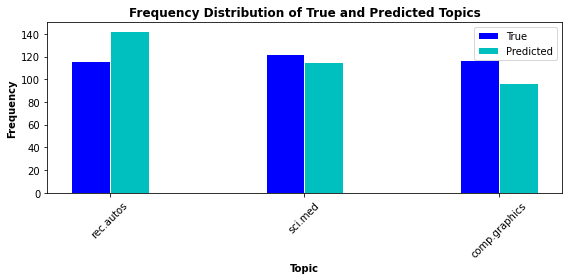

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the distribution of the actual topics in the test set
unique_true, counts_true = np.unique(y_test, return_counts=True)

# Plot the distribution of the predicted topics
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

plt.figure(figsize=(8,4))

# Create bar width
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(counts_true))
r2 = [x + barWidth for x in r1]

# Create subplot for 'true' distribution
plt.bar(r1, counts_true, color='b', width=barWidth, edgecolor='white', label='True')

# Create subplot for 'predicted' distribution
plt.bar(r2, counts_pred, color='c', width=barWidth, edgecolor='white', label='Predicted')

plt.xlabel('Topic', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Frequency Distribution of True and Predicted Topics', fontweight='bold')

plt.xticks([r + barWidth/2 for r in range(len(counts_true))], categories, rotation=45)

plt.legend()

plt.tight_layout()
plt.savefig('topic_distribution.png')
plt.show()

## Discussion Questions

Experiment with the above code before class and think about the answers to the following questions. It does not matter if you do not do all the questions; the main thing is to do some of them and come to class ready for the discussion.

1. **Data Preprocessing**
    - Is the order of the steps in data preprocessing important? What happens if you change the order?
    - Compare the model's performance on all metrics with and without stopword removal. Are the results much different?
    - See if you can find the stopword list used by `nltk`. What do you think of it?
    - Find out how to use the English stopword list with `sklearn` and see if the results are better or worse.
    - Discuss the advantages and disadvantages of stemming. Would lemmatization be a better option for this problem?
2. **Feature Extraction**
    - What is the definition of *word* used by `TfidfVectorizer` in `sklearn`? Is there a better definition you can think of? Define the regex.
    - Look carefully at the parameters of `TfidfVectorizer`. How do they affect the performance of the models?
    - Try replacing `TfidfVectorizer` by `CountVectorizer`, which simply records word counts (term frequencies). Are the results better or worse?
3. **Model Training**
    - Discuss the parameters of `BernoulliNB`. How do they affect the model's performance?
    - Here we chose the Bernoulli Naive Bayes classifier for this problem. Does Multinomial Naive Bayes work better? Which is supposed to work better?
    - Are the classes balanced or imbalanced? Is this realistic? Plot the distribution of class labels in the full dataset to show the distribution.
    - How well do the Bernoulli Naive Bayes and Multinomial Naive Bayes classifiers work when the classes are imbalanced? Try some experiments.
    - This seems to be a particularly "easy" classification task. Try the model with more of the 20 categories? Can the good results be replicated?
    - In this dataset, each document is given exactly one "ground truth" label. How could we handle the situation where some documents have no label?
4. **Model Evaluation**
    - Discuss the performance of the Bernoulli Naive Bayes model. Is the model performing well? What can be done to improve its performance?
    - Here we used only one training-test split. Should we have used cross-validation? Check the `sklearn` documentation to find out how to do this.
    - Discuss the evaluation metrics chosen. Are there other metrics that would provide more insights into the performance of the models?
    - What do these results tell us about how to build a recommender system based on this model?
5. **General Questions**
    - Why do we need to classify into topics and subtopics? How well would the recommender system work if we just compared news articles directly?
    - What sort of subtopics would be useful with the current classification scheme?
    - How might the recommendations differ if we used a collaborative filtering approach instead of a content-based approach? What are the pros and cons?
    - Can you think of any other potential applications of text classification and document similarity in the context of news articles?

## Advanced

1. Research one model not covered in class, such as Logistic Regression, Random Forests, SVM, etc. Which of these methods would be suitable for this topic classification task? Explain why.
